In [28]:
import pandas as pd
import numpy as np


In [29]:
df=pd.read_csv("cancer.csv")

In [30]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [34]:
label=df.iloc[:,1].values


In [35]:
features=df.iloc[:,2:].values

In [36]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
label=lbl.fit_transform(label)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=train_test_split(features,label,
                                                    test_size=0.2,random_state=0)
model=LogisticRegression()
model.fit(x_train,y_train)
Train_score=model.score(x_train,y_train)
Test_score=model.score(x_test,y_test)
print(Train_score)
print(Test_score)

0.9428571428571428
0.9649122807017544


In [46]:
from sklearn.metrics import classification_report,confusion_matrix,plot_precision_recall_curve,accuracy_score
cm=confusion_matrix(label,model.predict(features))
cm

array([[346,  11],
       [ 19, 193]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model.predict_proba(features)[:,1]

#Cal PR Curve
precision,recall,t = precision_recall_curve(label,probabilityValues)

#Calc AUC
auc = auc(recall,precision)
print(auc)

#Plot Skill Line
plt.plot([0,1],[0.5,0.5],linestyle='--')

#plot PR
plt.plot(recall,precision)


0.9872424539012057


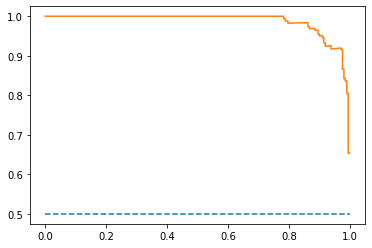

In [54]:
from sklearn.metrics import precision_recall_curve #As it is a unbalanced problem
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline



probabilityvalues= model.predict_proba(features)[:,1]

precision,recall,thre=precision_recall_curve(label,probabilityvalues)

auc=auc(recall,precision)
print(auc)

plt.plot([0,1],[0.5,0.5],linestyle='--')

plt.plot(recall,precision)